In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [156]:
def load_data():
    df = pd.read_csv("smartphone_activity_dataset.csv")
    return df

In [138]:
def load_description():
    attributes = pd.read_csv("attributes_smartphone_activity.csv")
    return attributes

In [139]:
df = load_data()

In [140]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 562 columns):
 #   Column       Dtype  
---  ------       -----  
 0   feature_1    float64
 1   feature_2    float64
 2   feature_3    float64
 3   feature_4    float64
 4   feature_5    float64
 5   feature_6    float64
 6   feature_7    float64
 7   feature_8    float64
 8   feature_9    float64
 9   feature_10   float64
 10  feature_11   float64
 11  feature_12   float64
 12  feature_13   float64
 13  feature_14   float64
 14  feature_15   float64
 15  feature_16   float64
 16  feature_17   float64
 17  feature_18   float64
 18  feature_19   float64
 19  feature_20   float64
 20  feature_21   float64
 21  feature_22   float64
 22  feature_23   float64
 23  feature_24   float64
 24  feature_25   float64
 25  feature_26   float64
 26  feature_27   float64
 27  feature_28   float64
 28  feature_29   float64
 29  feature_30   float64
 30  feature_31   float64
 31  feature_32   float64
 32  f

In [178]:
descr = load_description()
descr

,name,type,description
0,feature_1,float,tBodyAcc-mean()-X
1,feature_2,float,tBodyAcc-mean()-Y
2,feature_3,float,tBodyAcc-mean()-Z
3,feature_4,float,tBodyAcc-std()-X
4,feature_5,float,tBodyAcc-std()-Y
...,...,...,...
557,feature_558,float,"angle(tBodyGyroJerkMean,gravityMean)"
558,feature_559,float,"angle(X,gravityMean)"
559,feature_560,float,"angle(Y,gravityMean)"
560,feature_561,float,"angle(Z,gravityMean)"


In [141]:
y = df["activity"]
X = df.drop(['activity'],axis=1)

In [157]:
def split_data(df):
    
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, stratify=y, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
    )
    return X_train, X_val, X_test, y_train, y_val, y_test 

In [158]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)

In [144]:
def remove_correlated(df):
    corr = df.corr()

    # Create a mask for values above 80% 
    # But also below 100% since it variables correlated with the same one
    mask = (abs(df.corr(method = 'spearman')) > 0.65) & (df.corr() < 1.0)
    high_corr = corr[mask]

    # Create a new column mask using any() and ~
    col_to_filter_out = ~high_corr[mask].any()

    # Apply new mask
    df_clean = df[high_corr.columns[col_to_filter_out]]

    # Visualize cleaned dataset
    return df_clean

In [145]:
correlated_removed_train = remove_correlated(X_train)
correlated_removed_train

,feature_2,feature_3,feature_38,feature_39,feature_40,feature_64,feature_65,feature_78,feature_79,feature_80,...,feature_449,feature_450,feature_451,feature_452,feature_453,feature_454,feature_512,feature_525,feature_538,feature_551
4111,-0.0275,-0.0996,-0.4360,-0.2570,0.4870,-1.000,-1.000,0.851,0.4550,0.20700,...,-0.867,0.0323,-0.586,-0.0269,0.1510,-0.03070,-0.724,-0.8730,-0.795,-0.873
8040,-0.0195,-0.1090,0.7330,-0.0240,-0.0262,-0.459,-0.906,0.793,0.6100,0.00399,...,-1.000,-1.0000,-0.310,-0.3560,-0.6260,-0.10400,-0.931,-1.0000,-0.949,-1.000
7234,-0.0190,-0.1040,0.2030,-0.3730,-0.1340,-0.981,-0.847,0.256,-0.4060,-0.93100,...,-1.000,-0.9350,-0.931,0.0175,-0.3060,-0.15000,-0.862,-0.7460,-1.000,-0.683
833,-0.0021,-0.0866,-0.2070,0.0677,0.3090,-1.000,-1.000,-0.532,0.2840,-0.14400,...,-1.000,-0.9350,-0.793,-0.1210,-0.0516,0.06600,-0.517,-0.9050,-0.538,-0.905
2552,-0.0215,-0.1070,-0.1140,-0.3010,0.1910,-1.000,-0.938,-0.243,0.4540,0.64500,...,-0.600,-0.7420,-0.793,-0.1190,0.0134,-0.18000,-0.310,0.0794,-1.000,-0.905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,-0.0155,-0.0701,-0.4270,-0.1010,0.1530,-1.000,-1.000,0.215,-0.0493,0.25400,...,-1.000,-0.9350,-0.931,-0.2410,-0.5670,-0.16500,-0.793,-0.9050,-0.846,-0.905
5920,-0.0184,-0.1000,0.5050,-0.8000,-0.6180,-1.000,-0.833,0.458,-0.9020,-0.33400,...,-0.933,-0.8710,-0.724,-0.1640,-0.6770,-0.00203,-1.000,-0.7460,-1.000,-0.937
1451,-0.0144,-0.1660,-0.2370,-0.2900,0.2660,-1.000,-1.000,-0.393,0.9940,-0.37500,...,-0.933,-0.8060,-0.931,-0.1910,-0.0922,-0.30600,-0.793,-0.9050,-0.949,-0.905
1307,-0.0233,-0.1960,-0.4930,-0.5380,0.2440,-1.000,-0.500,0.922,0.9830,0.88700,...,-0.933,-0.2260,-0.793,0.0428,-0.2120,0.21600,-0.448,-0.9050,-0.949,-0.905


In [146]:
correlated_removed_train = remove_correlated(X_train)
correlated_removed_train.columns

Index(['feature_2', 'feature_3', 'feature_38', 'feature_39', 'feature_40',
       'feature_64', 'feature_65', 'feature_78', 'feature_79', 'feature_80',
       'feature_82', 'feature_83', 'feature_109', 'feature_113', 'feature_117',
       'feature_118', 'feature_119', 'feature_120', 'feature_122',
       'feature_123', 'feature_158', 'feature_159', 'feature_160',
       'feature_162', 'feature_163', 'feature_189', 'feature_193',
       'feature_197', 'feature_198', 'feature_199', 'feature_200',
       'feature_238', 'feature_239', 'feature_264', 'feature_265',
       'feature_291', 'feature_292', 'feature_293', 'feature_370',
       'feature_371', 'feature_372', 'feature_449', 'feature_450',
       'feature_451', 'feature_452', 'feature_453', 'feature_454',
       'feature_512', 'feature_525', 'feature_538', 'feature_551'],
      dtype='object')

In [147]:
def check_what_influence(X,y,n):
    X_copy = X.copy()
    X_copy["activity"] = y
    corr_matrix = X_copy.corr(method = 'spearman').abs()
    corr_matrix = corr_matrix["activity"]
    return corr_matrix.nlargest(n).iloc[1:]

In [148]:
def choose_the_best(df,features):
    df = df[features]
    return df

In [149]:
features_train = check_what_influence(correlated_removed_train, y_train, 50)
features_train

feature_512    0.526651
feature_538    0.520730
feature_293    0.468375
feature_450    0.451214
feature_451    0.442403
feature_370    0.423657
feature_551    0.406062
feature_64     0.386196
feature_292    0.367070
feature_160    0.350539
feature_117    0.311181
feature_38     0.306293
feature_109    0.298672
feature_120    0.291736
feature_454    0.274073
feature_40     0.271408
feature_525    0.269262
feature_197    0.261231
feature_291    0.261017
feature_372    0.260018
feature_113    0.217003
feature_118    0.175472
feature_198    0.171774
feature_119    0.170594
feature_371    0.168921
feature_239    0.168369
feature_79     0.161682
feature_159    0.151096
feature_200    0.118650
feature_65     0.110246
feature_449    0.104448
feature_264    0.100503
feature_452    0.092424
feature_238    0.091418
feature_158    0.083570
feature_80     0.082975
feature_193    0.082663
feature_123    0.048739
feature_265    0.048606
feature_39     0.047128
feature_163    0.041576
feature_3      0

In [165]:
def preprocess_data(X,y):
    X = remove_correlated(X)
    features = check_what_influence(X,y,50)
    features_list = [str(col) for col in features.index]
    X = choose_the_best(X,features_list)
    return X,y

In [159]:
#defining new function to keep same columns as in train data set
def preprocess_data_train_val(X_val):
    X_val = X_val[correlated_removed_train.columns]
    features_list = [str(col) for col in features_train.index]
    X_val = X_val[features_list]
    return X_val

In [166]:
X_train,y_train = preprocess_data(X_train,y_train)

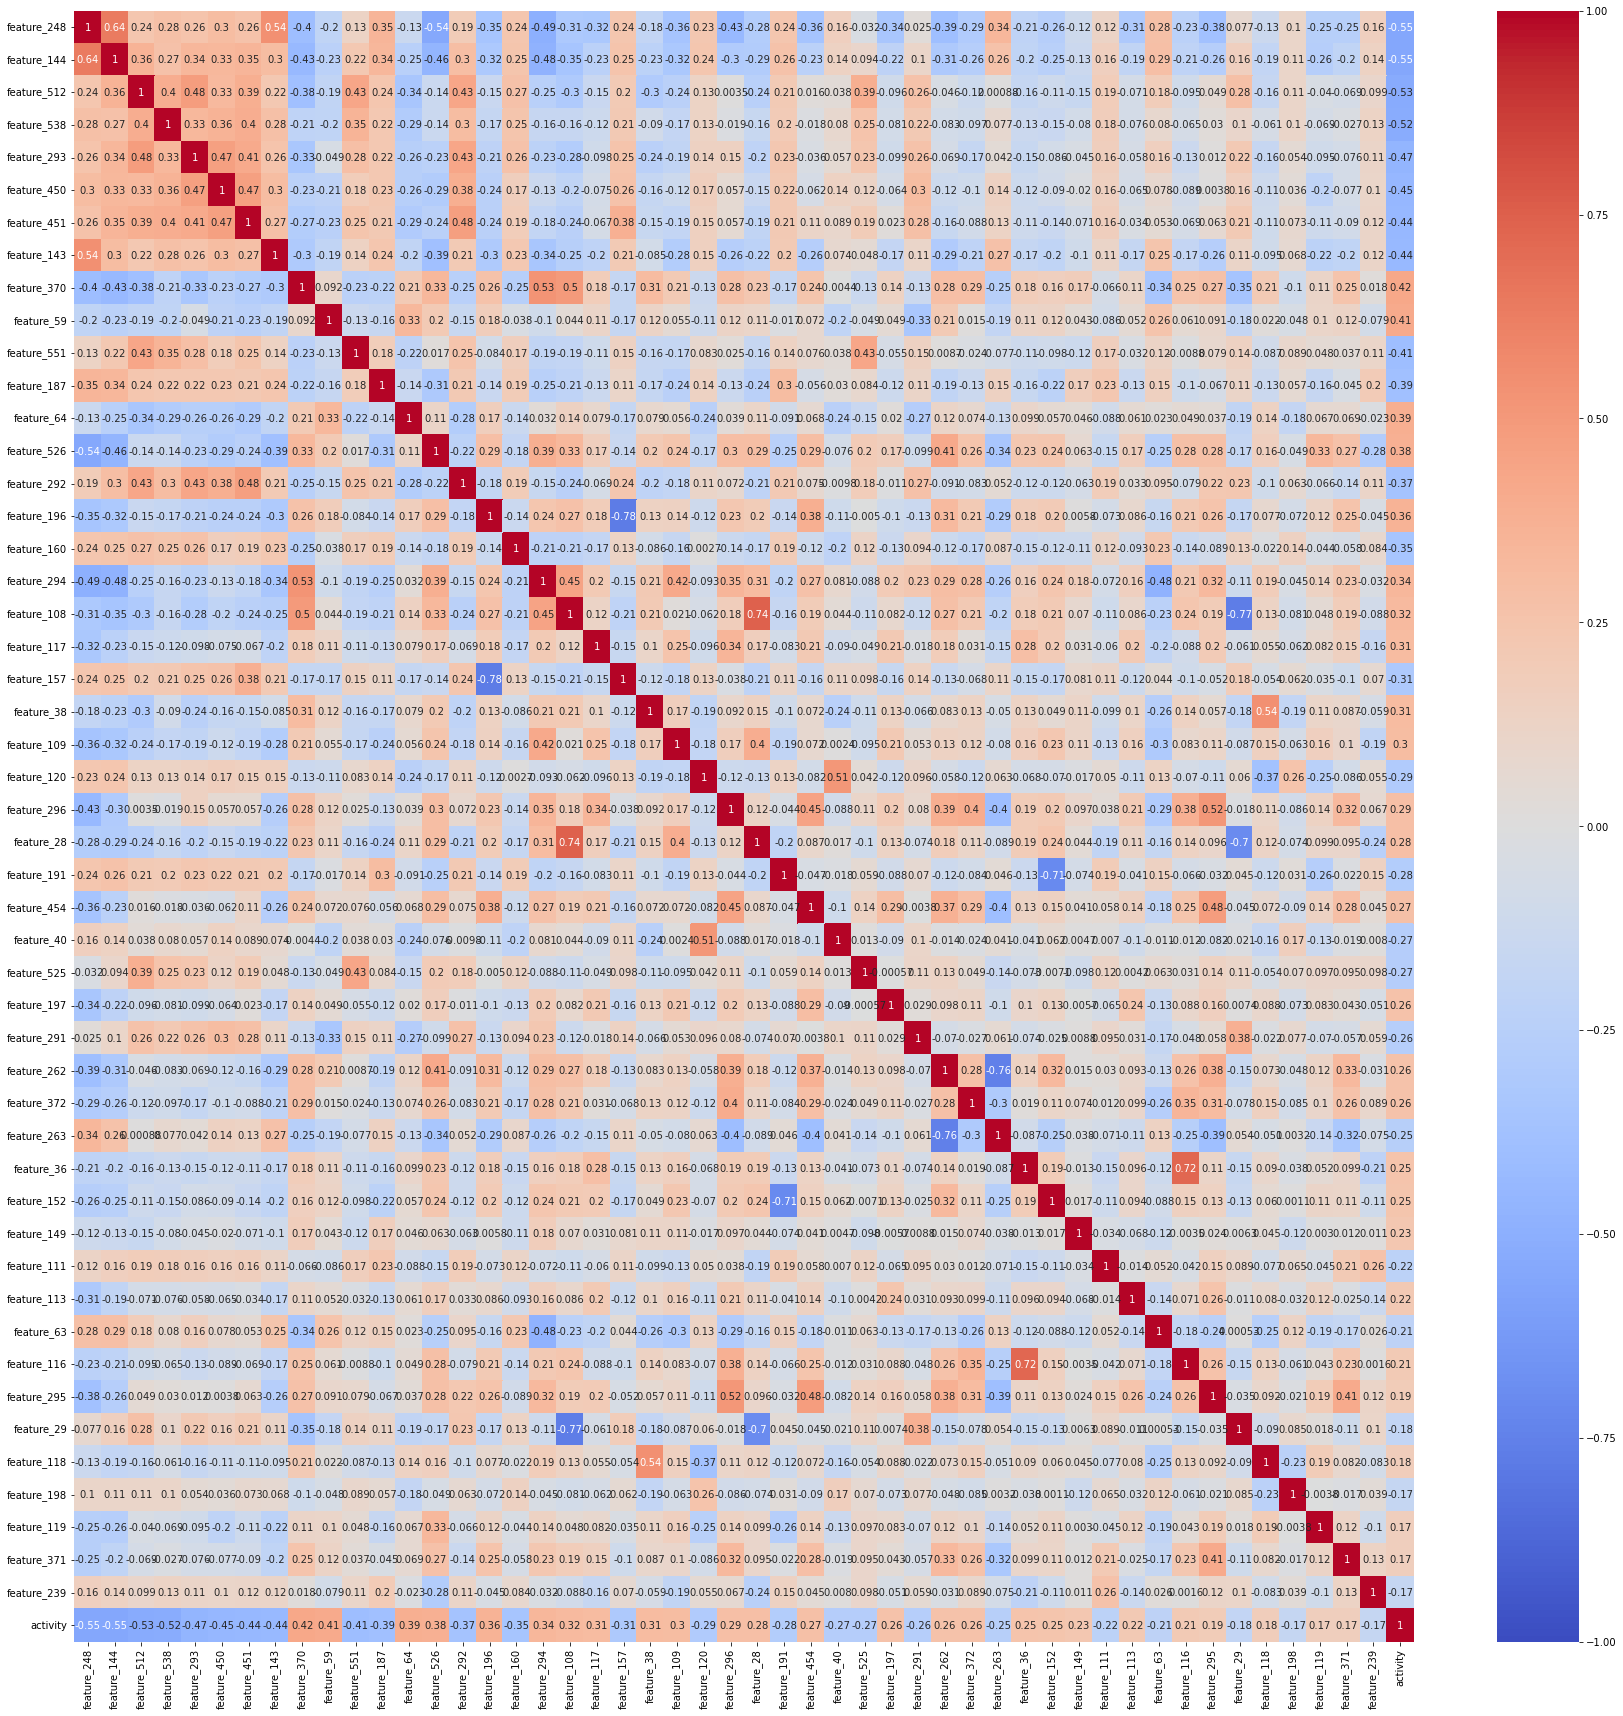

In [75]:
#corr map on shorter dataset
df = X_train.copy()
df["activity"] = y_train
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(method='spearman'), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

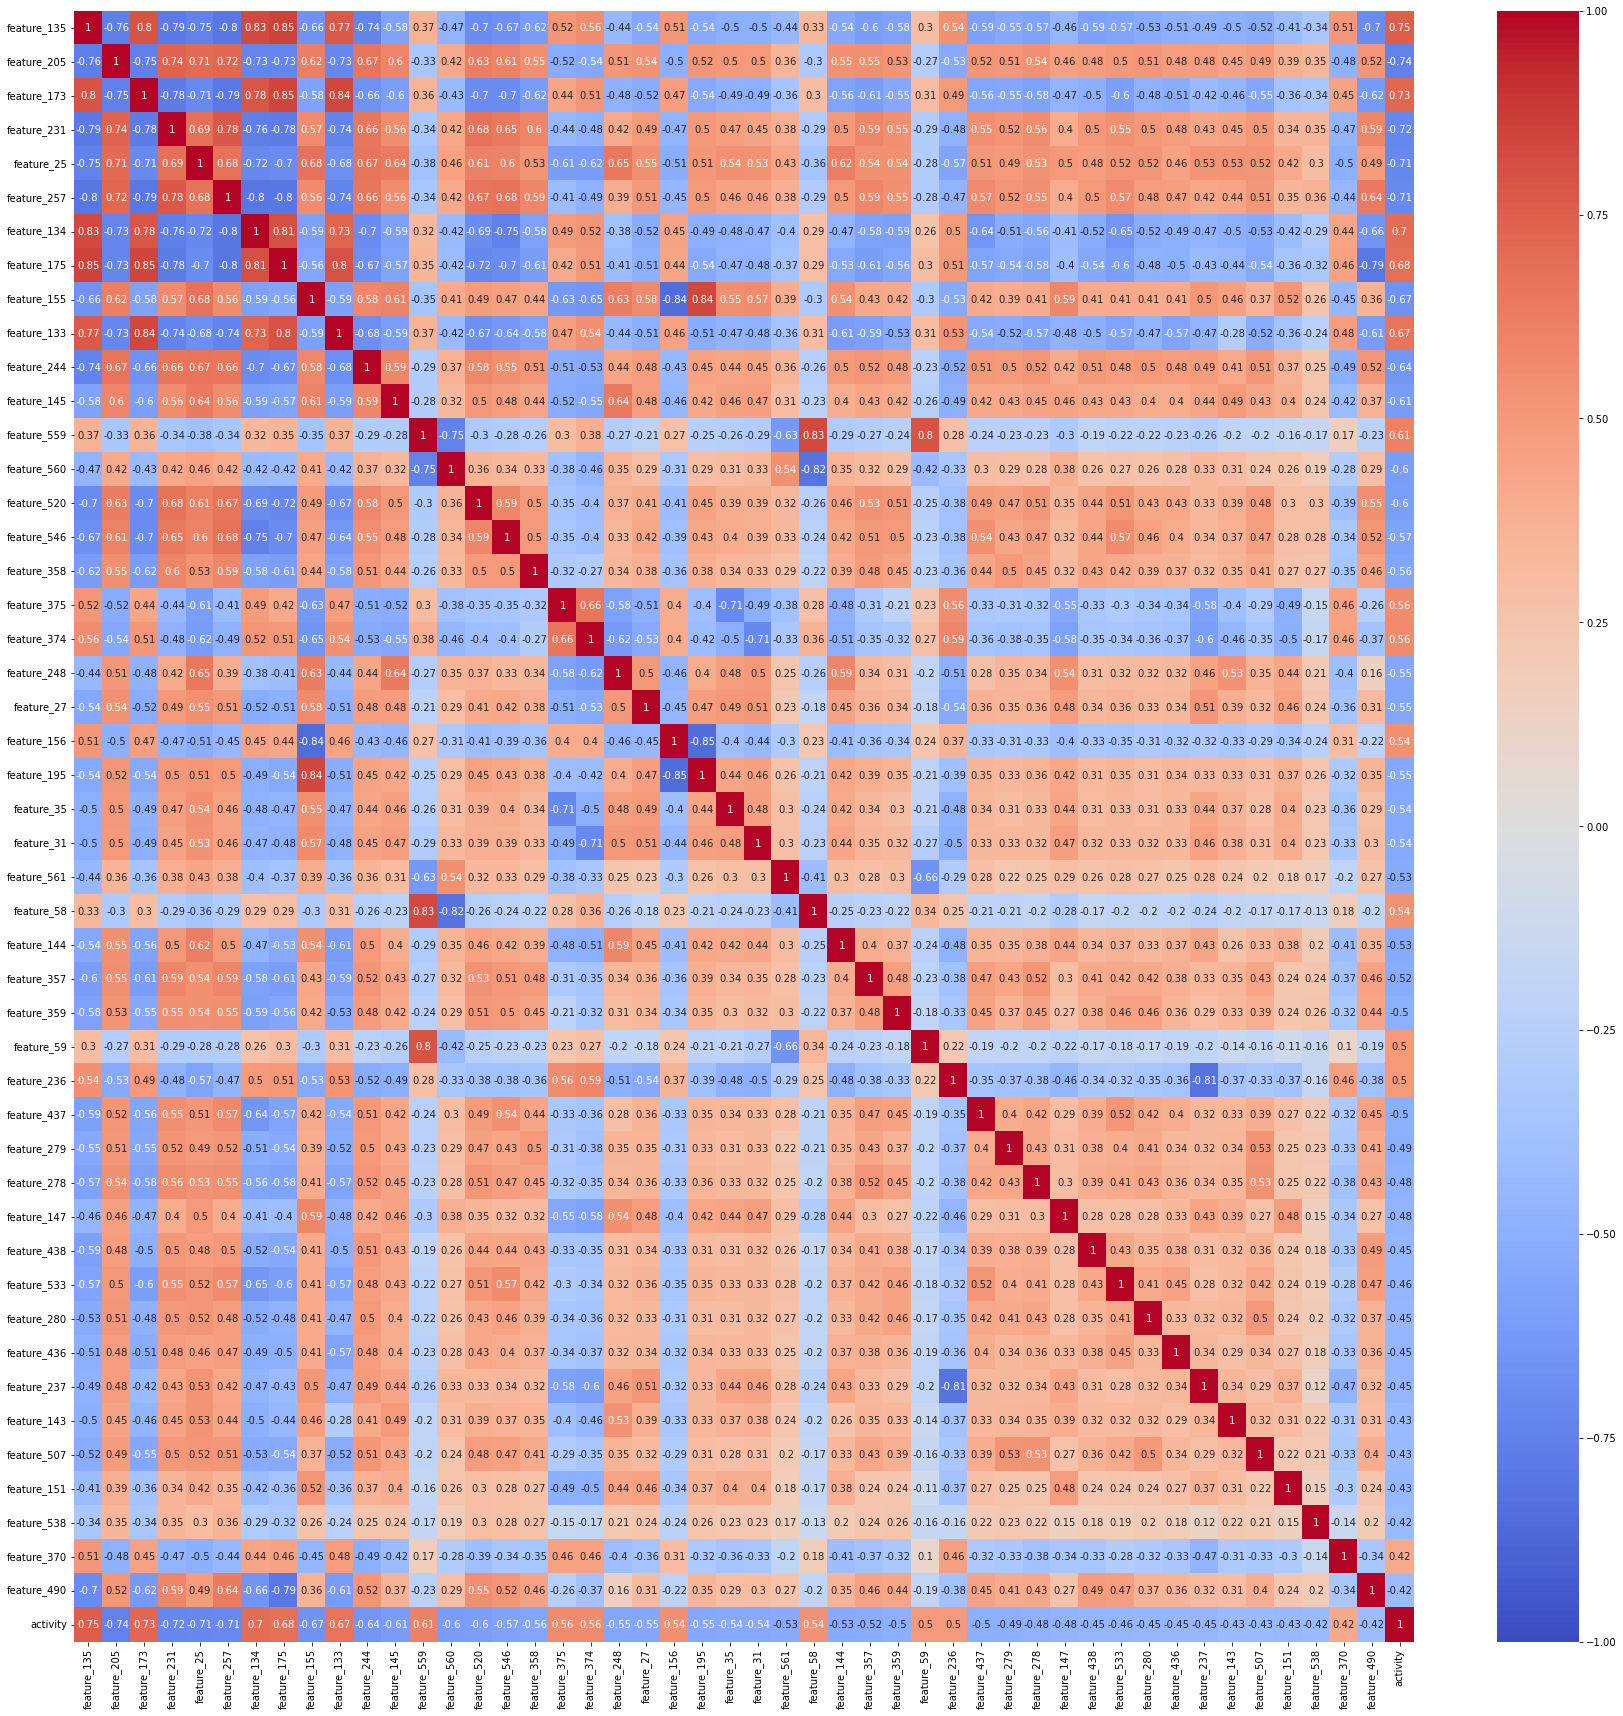

In [141]:
# #corr map on shorter dataset
# df = X_train.copy()
# df["activity"] = y_train
# plt.figure(figsize=(30, 30))
# sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

In [93]:
print("X_train:",len(X_train))
print("y_train:",len(y_train))
print("X_val:",len(X_val))
print("y_val:",len(y_val))
print("X_test:",len(X_test))
print("y_test:",len(y_test))

X_train: 7209
y_train: 7209
X_val: 2163
y_val: 2163
X_test: 927
y_test: 927


In [167]:
X_train.shape

(7209, 49)

In [95]:
X_train.columns

Index(['feature_512', 'feature_538', 'feature_293', 'feature_450',
       'feature_451', 'feature_370', 'feature_551', 'feature_64',
       'feature_292', 'feature_160', 'feature_117', 'feature_38',
       'feature_109', 'feature_120', 'feature_454', 'feature_40',
       'feature_525', 'feature_197', 'feature_291', 'feature_372',
       'feature_113', 'feature_118', 'feature_198', 'feature_119',
       'feature_371', 'feature_239', 'feature_79', 'feature_159',
       'feature_200', 'feature_65', 'feature_449', 'feature_264',
       'feature_452', 'feature_238', 'feature_158', 'feature_80',
       'feature_193', 'feature_123', 'feature_265', 'feature_39',
       'feature_163', 'feature_3', 'feature_199', 'feature_162', 'feature_2',
       'feature_189', 'feature_453', 'feature_122', 'feature_78'],
      dtype='object')

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7209 entries, 4111 to 8906
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_512  7209 non-null   float64
 1   feature_538  7209 non-null   float64
 2   feature_293  7209 non-null   float64
 3   feature_450  7209 non-null   float64
 4   feature_451  7209 non-null   float64
 5   feature_370  7209 non-null   float64
 6   feature_551  7209 non-null   float64
 7   feature_64   7209 non-null   float64
 8   feature_292  7209 non-null   float64
 9   feature_160  7209 non-null   float64
 10  feature_117  7209 non-null   float64
 11  feature_38   7209 non-null   float64
 12  feature_109  7209 non-null   float64
 13  feature_120  7209 non-null   float64
 14  feature_454  7209 non-null   float64
 15  feature_40   7209 non-null   float64
 16  feature_525  7209 non-null   float64
 17  feature_197  7209 non-null   float64
 18  feature_291  7209 non-null   float64
 19  fea

In [97]:
X_train.describe()

,feature_512,feature_538,feature_293,feature_450,feature_451,feature_370,feature_551,feature_64,feature_292,feature_160,...,feature_39,feature_163,feature_3,feature_199,feature_162,feature_2,feature_189,feature_453,feature_122,feature_78
count,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,...,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000
mean,-0.755329,-0.888244,-0.842875,-0.802839,-0.809456,-0.411952,-0.901124,-0.867721,-0.796596,-0.101958,...,-0.192997,-0.055208,-0.109283,0.046339,-0.042832,-0.017511,0.166827,-0.171553,-0.074134,0.171921
std,0.258487,0.157902,0.240932,0.286762,0.233007,0.320531,0.134903,0.277990,0.242849,0.416876,...,0.324306,0.129141,0.050239,0.267637,0.115235,0.037033,0.209716,0.271365,0.134597,0.696865
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.998000,-1.000000,-1.000000,-1.000000,-0.871000,-1.000000,-0.670000,-1.000000,-0.926000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.680000,-0.968000,-1.000000,-1.000000,-0.407000,...,-0.404000,-0.079800,-0.121000,-0.125000,-0.058700,-0.025000,0.031900,-0.356000,-0.104000,-0.494000
50%,-0.793000,-0.949000,-0.923000,-0.935000,-0.931000,-0.400000,-0.905000,-1.000000,-0.800000,-0.087000,...,-0.187000,-0.054700,-0.109000,0.043100,-0.040600,-0.017100,0.171000,-0.167000,-0.074700,0.348000
75%,-0.517000,-0.846000,-0.769000,-0.677000,-0.655000,-0.160000,-0.873000,-0.851000,-0.733000,0.193000,...,0.003880,-0.032800,-0.097700,0.214000,-0.025500,-0.010600,0.307000,0.016500,-0.050200,0.837000
max,1.000000,0.949000,0.923000,0.806000,0.655000,1.000000,0.968000,1.000000,1.000000,1.000000,...,1.000000,0.880000,1.000000,1.000000,1.000000,1.000000,1.000000,0.994000,1.000000,1.000000


In [98]:
print(len(X_train))
print(len(y_train))

7209
7209


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233219BF730>,
      dtype=object)

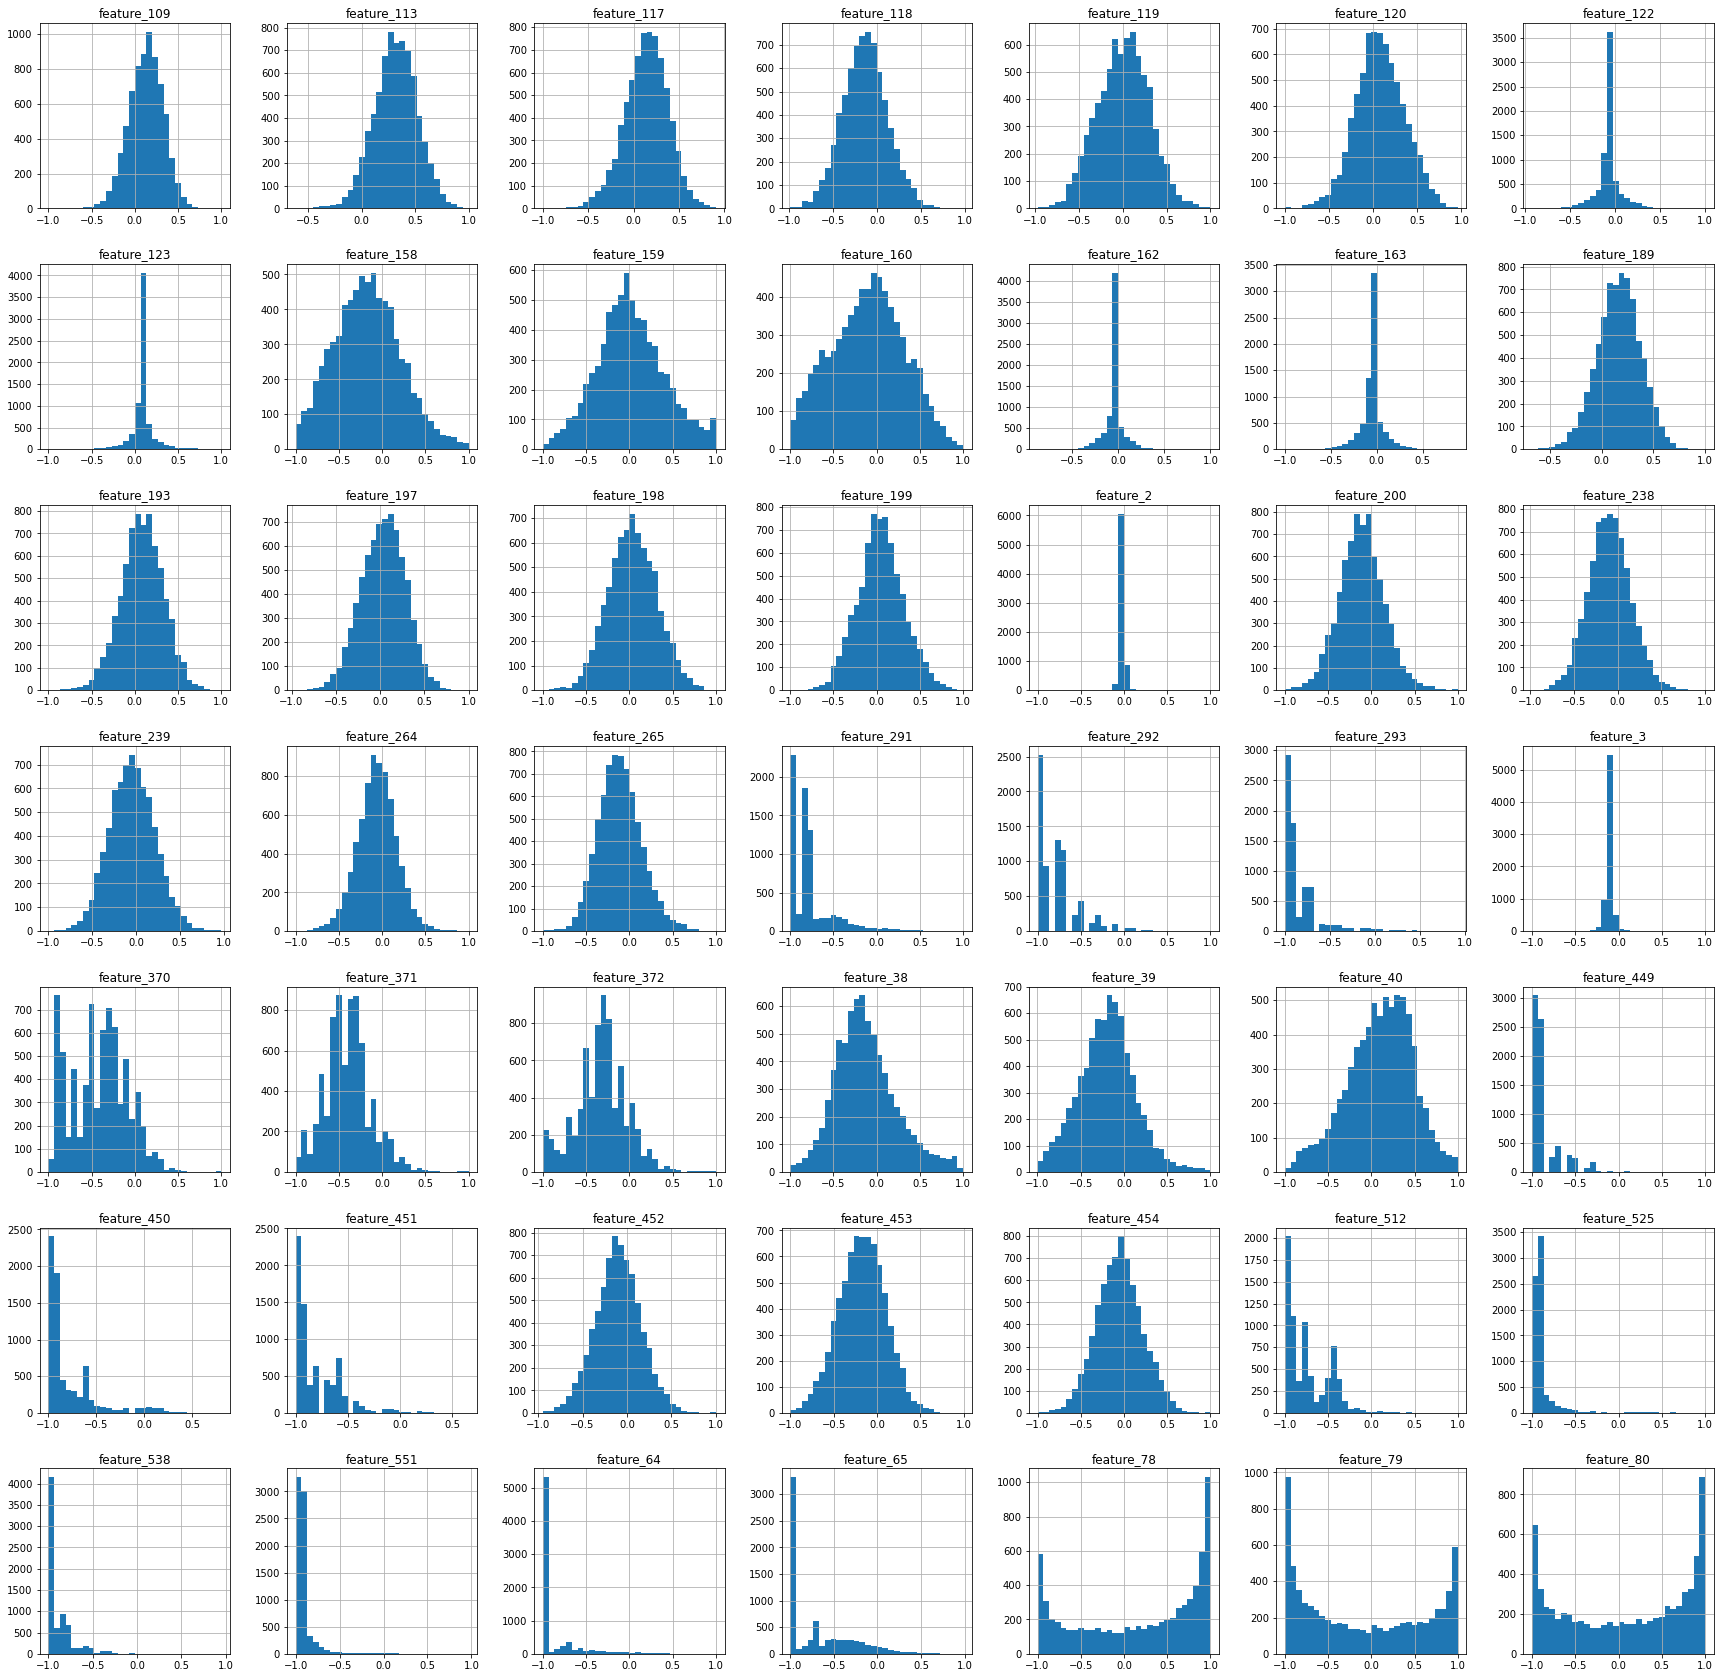

In [99]:
X_train.hist(bins=30, figsize=(30, 30))

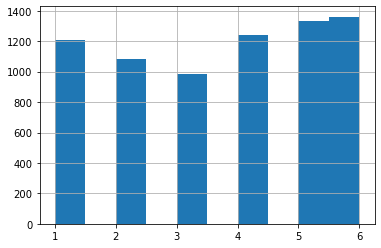

In [25]:
y_train.hist()

In [132]:
(df[df.columns] == 0).sum(axis = 0)

feature_135      0
feature_205      0
feature_218      0
feature_173      0
feature_231      0
feature_25       0
feature_257      0
feature_134      0
feature_175      0
feature_155      0
feature_133      0
feature_244      0
feature_174      0
feature_145      0
feature_559      0
feature_560      0
feature_520      0
feature_546      0
feature_358      0
feature_375      0
feature_374      0
feature_248      0
feature_27       0
feature_156      0
feature_195      0
feature_35       2
feature_31       0
feature_561      0
feature_58       0
feature_144      0
feature_357      0
feature_359      0
feature_59       0
feature_236      0
feature_437      0
feature_279      0
feature_278      0
feature_147      1
feature_438      0
feature_533      0
feature_280      0
feature_436      0
feature_237      0
feature_143      1
feature_507      0
feature_151      0
feature_538      0
feature_370    186
feature_490      0
activity         0
dtype: int64

In [133]:
df.nunique() / len(df) * 100

feature_135    16.326814
feature_205     9.377167
feature_218     9.377167
feature_173    12.720211
feature_231    12.581495
feature_25     26.355944
feature_257    11.998890
feature_134    10.805937
feature_175    11.499514
feature_155    28.617007
feature_133    12.942156
feature_244    15.785823
feature_174    11.138854
feature_145    27.451796
feature_559    15.882924
feature_560    22.846442
feature_520    14.079623
feature_546    10.375919
feature_358    11.457900
feature_375    31.793591
feature_374    29.435428
feature_248    30.226106
feature_27     32.764600
feature_156    32.334582
feature_195    33.055902
feature_35     32.931058
feature_31     31.904564
feature_561    37.453184
feature_58     15.924539
feature_144    29.865446
feature_357    10.237203
feature_359    10.001387
feature_59     15.799695
feature_236    31.252601
feature_437     8.836177
feature_279     9.890415
feature_278    11.582744
feature_147    31.682619
feature_438     8.142600
feature_533     9.210709


In [32]:
y_train

4111    1
8040    6
7234    6
833     2
2552    5
       ..
316     2
5920    4
1451    2
1307    2
8906    4
Name: activity, Length: 7209, dtype: int64

In [164]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_552,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561
4111,0.284,-0.0275,-0.0996,-0.2890,0.00495,-0.11800,-0.3440,-0.0117,-0.1220,0.1040,...,0.1150,0.4230,0.204,-0.2430,-0.3760,0.264,-0.5260,-0.559,0.3510,0.1870
8040,0.254,-0.0195,-0.1090,-0.9480,-0.94200,-0.98000,-0.9490,-0.9320,-0.9840,-0.9100,...,-0.0992,-0.2790,-0.663,-0.0950,-0.2320,0.145,-0.0162,0.827,-0.0440,-0.9030
7234,0.270,-0.0190,-0.1040,-0.9930,-0.99300,-0.98800,-0.9950,-0.9930,-0.9880,-0.9360,...,0.5840,-0.6050,-0.854,0.0345,0.1180,-0.236,0.5070,0.516,-0.5510,-0.4490
833,0.297,-0.0021,-0.0866,-0.1210,0.24400,-0.30600,-0.1810,0.2850,-0.2560,0.0132,...,0.0929,0.1020,-0.233,-0.1100,-0.7600,-0.924,-0.0516,-0.791,0.2410,0.0410
2552,0.277,-0.0215,-0.1070,-0.9960,-0.97800,-0.98900,-0.9960,-0.9800,-0.9890,-0.9430,...,0.1010,-0.3430,-0.718,-0.0381,0.2490,-0.296,0.2120,-0.827,0.1830,-0.0701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.252,-0.0155,-0.0701,-0.2800,0.11800,-0.00167,-0.3120,0.1050,0.0731,-0.0862,...,0.0700,-0.2110,-0.579,0.3090,0.8380,0.928,-0.4190,-0.610,0.3600,0.0812
5920,0.275,-0.0184,-0.1000,-0.9900,-0.98000,-0.97100,-0.9900,-0.9810,-0.9670,-0.9390,...,0.0119,-0.3250,-0.649,-0.1380,0.0139,-0.429,0.4090,-0.316,-0.2050,-0.3360
1451,0.212,-0.0144,-0.1660,-0.3590,-0.43700,-0.20700,-0.3920,-0.4280,-0.1670,-0.2510,...,-0.1090,-0.0890,-0.550,0.1030,-0.4900,0.939,-0.9600,-0.497,0.2070,0.3590
1307,0.307,-0.0233,-0.1960,0.0175,0.28300,-0.29600,-0.0635,0.1700,-0.3160,0.5380,...,-0.0583,-0.2700,-0.634,-0.1560,-0.9210,0.934,0.5540,-0.669,0.3260,0.0357


In [160]:
X_val = preprocess_data_train_val(X_val)

In [161]:
X_val

,feature_512,feature_538,feature_293,feature_450,feature_451,feature_370,feature_551,feature_64,feature_292,feature_160,...,feature_39,feature_163,feature_3,feature_199,feature_162,feature_2,feature_189,feature_453,feature_122,feature_78
2213,-0.586,-1.000,-0.923,-0.935,-0.862,-0.88,-0.937,-1.000,-0.800,0.05990,...,0.0117,0.02580,-0.1150,-0.3330,-0.19900,0.03830,-0.0260,-0.3090,-0.5870,-0.922
4917,-1.000,-1.000,-1.000,-1.000,-1.000,0.24,-0.905,-0.617,-1.000,-0.98700,...,-0.6500,-0.07460,-0.1150,-0.2060,-0.01780,-0.01710,0.3100,-0.1610,-0.2150,-0.932
3920,-0.379,-0.538,-0.692,-0.548,-0.517,-0.84,-0.873,-1.000,-0.733,0.09720,...,-0.5270,-0.53300,-0.1190,0.7420,-0.03450,-0.03270,0.3000,0.0165,-0.1940,0.779
7893,-0.793,-0.949,-0.462,-1.000,-1.000,0.16,-0.937,-0.801,-1.000,-0.22700,...,-0.1320,-0.05330,-0.1110,0.3470,-0.03390,-0.01750,0.3390,-0.5670,-0.0837,0.358
3138,-0.931,-0.949,-1.000,-1.000,-0.448,-0.68,-0.746,-1.000,-1.000,0.57800,...,-0.8330,-0.05420,-0.1110,0.3480,-0.03630,-0.01690,0.1680,-0.4830,-0.0647,-0.997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,-0.862,-1.000,-1.000,-1.000,-0.448,-0.64,-1.000,-1.000,-0.667,-0.24300,...,-0.3240,-0.04500,-0.0812,0.1400,-0.05430,-0.01670,-0.0591,-0.3530,-0.0654,0.178
2891,-1.000,-1.000,-1.000,-1.000,-0.793,-0.32,-1.000,-1.000,-1.000,-0.95700,...,0.9930,0.00669,0.1840,-0.3280,-0.09310,0.09650,-0.0167,-0.0365,0.0636,0.997
5036,-0.793,-0.846,-0.846,0.161,-0.931,-0.28,-0.905,-1.000,-0.933,0.00837,...,-0.6430,0.09220,-0.1560,0.2200,0.22400,-0.01430,0.1780,0.1060,-0.0377,0.847
7948,-0.448,-0.949,-0.923,-0.935,-0.793,-0.52,-0.968,-1.000,-0.467,0.02700,...,0.2290,0.05420,-0.0576,0.3410,-0.19900,-0.00212,-0.0469,-0.4130,-0.1640,0.689


In [171]:
X_test = preprocess_data_train_val(X_test)

In [191]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(multi_class="multinomial", max_iter=5000)

In [192]:
reg_log.fit(X_train,y_train)
y_pred = reg_log.predict(X_val)

In [202]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("accuracy: ", accuracy_score(y_val,y_pred))
print("precision: ", precision_score(y_val,y_pred, average='macro'))
print("recall: ", recall_score(y_val,y_pred, average='macro'))
print("f1: ", f1_score(y_val,y_pred, average='macro'))

accuracy:  0.8085991678224688
precision:  0.8091178971982952
recall:  0.8109830375091353
f1:  0.8098535006090183


In [207]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=1,
                    learning_rate=0.01, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    max_depth=4 # Maksymalna głębokość drzewa 
                    )
xgb.fit(X_train, y_train)
y_pred2 = xgb.predict(X_val)
print("accuracy: ", accuracy_score(y_val,y_pred2))
print("precision: ", precision_score(y_val,y_pred2, average='macro'))
print("recall: ", recall_score(y_val,y_pred2, average='macro'))
print("f1: ", f1_score(y_val,y_pred2, average='macro'))

[21:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  0.8109107720758206
precision:  0.8138154129267748
recall:  0.8144559865156031
f1:  0.8124549347337355


In [208]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(random_state=1)
adaBoost.fit(X_train, y_train)
adaBoost.fit(X_train, y_train)
y_pred3 = adaBoost.predict(X_val)
print("accuracy: ", accuracy_score(y_val,y_pred3))
print("precision: ", precision_score(y_val,y_pred3, average='macro'))
print("recall: ", recall_score(y_val,y_pred3, average='macro'))
print("f1: ", f1_score(y_val,y_pred3, average='macro'))

accuracy:  0.6495607951918632
precision:  0.6720965650529469
recall:  0.660463583009859
f1:  0.6606518360454083
